In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
rng = np.random.RandomState(42)

# Jouer avec les digits

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

**Question** Afficher et lire la description de ces données (attribut `DESCR`)

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**Question** Appeler `X` et `y` les données et la cible. Découper en `X_train`, `y_train`, `X_test`, `y_test` selon les indications données dans la description.

In [25]:
X = pd.DataFrame(data=mnist.data,   columns=mnist.feature_names)
y = pd.DataFrame(data=mnist.target, columns=mnist.target_names)

(70000, 784)

In [6]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng, train_size=6/7, test_size=1/7)

On peut visualiser quelques digits par ce petit code

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(5, 5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i,ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28,28), cmap='binary')
    ax.text(0.05, 0.05, str(y[i]),
            transform=ax.transAxes,
            color='red')

# ce bout de code ne marche pas sur ma machine somehow, je n'ai jamais pu visualiser ce qu'elle renvoyait

KeyError: 0

**Question** Créer  4 classifieurs de classe suivante. On prendra 5 voisins pour le $k$-plus proches voisins, et une profondeur de 20 pour les arbres de décision. Les mémoriser dans une liste `methods` pour plus de facilité.  

In [14]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
gnb = GaussianNB()
svc = SVC()
sgd = SGDClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
knn = KNeighborsClassifier(5)
methods = [gnb, dt, sgd, knn, lr, svc]

On considère les tailles de 100 à 4100 par pas de 1000. Par la suite on prendra des sous-échantillons de `X_train` tirés au hasard des tailles considérées (vous jouerez sur les indices plutôt que sur les données!!)

    sizes = list(range(100, 5000, 1000)) 

In [16]:
sizes = list(range(100, 5000, 1000)) 
sizes

[100, 1100, 2100, 3100, 4100]

# Mesurer les temps d'exécution

**Question** Regardez la documentation de %timeit

In [17]:
timeit?

Docstring:
Time execution of a Python statement or expression

Usage, in line mode:
  %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
or in cell mode:
  %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
  code
  code...

Time execution of a Python statement or expression using the timeit
module.  This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, the statement in the first line is used as setup code
  (executed but not timed) and the body of the cell is timed.  The cell
  body has access to any variables created in the setup code.

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
best result.
Default: 7

-t: use time.time to measure the time, which is the default on Unix.
This f

**Question** Que fait l'instruction ? 

    r = %timeit -o -q -r1 -n1 mon_appel_de_fonction

***Ma réponse :*** Cette instruction calcule le temps que met mon_appel_de_fonction à s'exécuter 1 fois dans une boucle exécutée 1 fois et stock ce temps dans la variable r sans l'afficher dans la sortie. Le site [ipython](ipython.org/ipython-doc/dev/interactive/magics.html#magic-timet) résume bien ce que font les options.

**Question** Remarquez ce que donne 
  
    <instance_de_methode_de_classif>.__class__.__name__

In [18]:
for m in methods:
    print(m.__class__.__name__)

GaussianNB
DecisionTreeClassifier
SGDClassifier
KNeighborsClassifier
LogisticRegression
SVC


**Question** En utilisant cela, faites le diagramme suivant :

![temps d'exécution](./temps.png)

Dans chaque courbe, les modèles sont entraînés sur les mêmes données, qui sont des sous échantillons de `X_train` tirés au hasard de chaque taille de la liste `sizes`. 

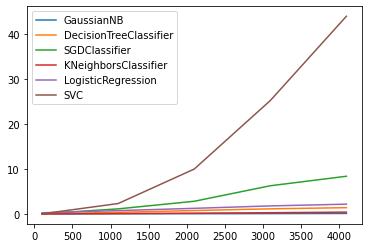

In [19]:
sousplot = plt.subplot()

for m in methods:
    diagramme1 = []
    for s in sizes:
        r = %timeit -o -q -r1 -n1 m.fit(X_train[0:s], y_train[0:s])
        diagramme1.append(r.best)
    sousplot.plot(sizes, diagramme1, label=m.__class__.__name__)

sousplot.legend()
plt.show()

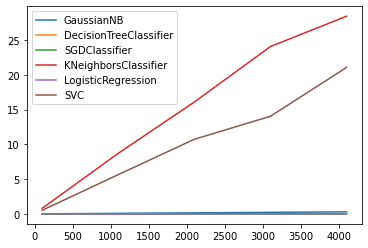

In [20]:
sousplot = plt.subplot()

for m in methods:
    diagramme2 = []
    for s in sizes:
        r = %timeit -o -q -r1 -n1 m.predict(X_test[0:s])
        diagramme2.append(r.best)
    sousplot.plot(sizes, diagramme2, label=m.__class__.__name__)

sousplot.legend()
plt.show()

# Mesurer les scores

**Question** Importer cross_val_score et lire la documentation

In [21]:
from sklearn.model_selection import cross_val_score

**Question** Tracer les courbes suivantes obtenues avec cross_val_score sur les différentes tailles. 

![precision](./acc.png)

(et vous voulez, car c'est plus joli... :-) )

![precision enveloppe](./acc_b.png)

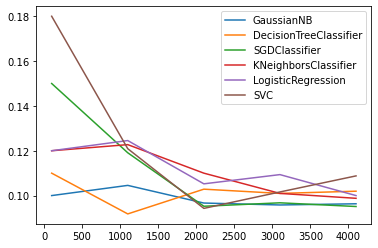

In [23]:
sousplot = plt.subplot()

for m in methods:
    diagramme3 = []
    for s in sizes:
        r = np.mean(cross_val_score(m, X_train[0:s], y_train[0:s], cv=5))
        diagramme3.append(r)
    sousplot.plot(sizes, diagramme3, label=m.__class__.__name__)

sousplot.legend()
plt.show()

# Matrice de confusion

On change de problème de classification en un problème binaire de détermination si un digit est le '3'.

In [26]:
y_train3 = (y_train == '3')
y_test3 = (y_test == '3')

**Question** Sélectionnez 5000 indices au hasard de X_train pour travailler sur un sous échantillon (nommé `Xs`, `ys`). Découpez ce sous-échantillon pour avoir un échantillon d'apprentissage et de validation. 

In [135]:
Xs = X_train.sample(5000)
ys = y_train[y_train.index.isin(Xs.index)]

In [137]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, random_state=rng, train_size=2/3, test_size=1/3)

**Question** Entraînez tous les classifieurs sur ce sous-échantillon et calculer dans un dictionnaire `pred` toutes les prédictions de chaque méthode sur l'échantillon de validation. 

In [139]:
pred = {
    'GaussianNB': [],
    'DecisionTreeClassifier': [],
    'SGDClassifier': [],
    'KNeighborsClassifier': [],
    'LogisticRegression': [],
    'SVC': []
}

for m in methods:
    m.fit(Xs_train, ys_train)
    pred[m.__class__.__name__] = m.predict(Xs_test)

**Question** Calculer les matrices de confusion pour `lr` et `sgd`. Affichez aussi les matrices de confusion de façon graphique (`plot_confusion_matrix`)


In [145]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

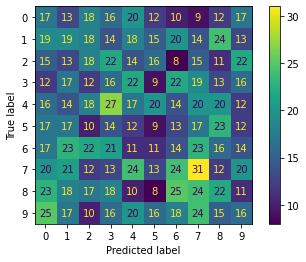

In [187]:
confusion_lr = confusion_matrix(ys_test, pred['LogisticRegression'])
plot_confusion_matrix(lr, Xs_test, ys_test)
plt.show()

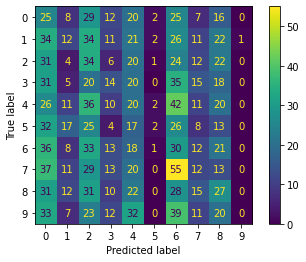

In [189]:
confusion_sgd = confusion_matrix(ys_test, pred['SGDClassifier'])
plot_confusion_matrix(sgd, Xs_test, ys_test)
plt.show()

**Question** En étudiant la matrice de confusion avec les prédictions dans `pred[lr]`, calculez 1 - le taux d'erreur (accuracy), la précision,  le rappel (sans utiliser les fonctions de `sklearn`).

En interprétant le problème comme un problème multi-classe, calculez la précision en micro et macro average

In [193]:
vrai_positif = confusion_lr[0][0]
faux_positif = np.sum(confusion_lr, axis=0)[0] - confusion_lr[0][0]
vrai_negatif = np.sum(confusion_lr) - np.sum(confusion_lr, axis=0)[0] - np.sum(confusion_lr, axis=1)[0]
faux_negatif = np.sum(confusion_lr, axis=1)[0] - confusion_lr[0][0]

accuracy = (vrai_positif + vrai_negatif) / (vrai_positif + vrai_negatif + faux_positif + faux_negatif)
precision = vrai_positif / (vrai_positif + faux_positif)
rappel = vrai_positif / (vrai_positif + faux_negatif)

print('accuracy  =', accuracy)
print('precision =', precision)
print('rappel    =', rappel)

accuracy  = 0.8236363636363636
precision = 0.09392265193370165
rappel    = 0.11805555555555555


**Question**  Affichez les mêmes résultats maintenant avec les fonctions de `sklearn`. 

In [226]:
from sklearn.metrics import accuracy_score
print('accuracy  =', (1 - accuracy_score(ys_test, pred["LogisticRegression"])))
print('precision =', accuracy_score(ys_test, pred["LogisticRegression"]))
print('rappel    =', )

accuracy  = 0.8926214757048591
precision = 0.10737852429514097
rappel    =


**Question** Utilisez `classification_report` pour afficher les résultats sur l'échantillon `valid` par les méthodes `lr` et `sgd`

In [222]:
from sklearn.metrics import classification_report

print(classification_report(ys_test, pred["SGDClassifier"]))
print('________________________________________________________')
print(classification_report(ys_test, pred["LogisticRegression"]))

              precision    recall  f1-score   support

           0       0.08      0.17      0.11       144
           1       0.13      0.07      0.09       174
           2       0.12      0.22      0.15       154
           3       0.13      0.09      0.11       158
           4       0.10      0.11      0.10       178
           5       0.20      0.01      0.03       144
           6       0.09      0.17      0.12       172
           7       0.11      0.06      0.08       190
           8       0.14      0.15      0.15       176
           9       0.00      0.00      0.00       177

    accuracy                           0.11      1667
   macro avg       0.11      0.11      0.09      1667
weighted avg       0.11      0.11      0.09      1667

________________________________________________________
              precision    recall  f1-score   support

           0       0.09      0.12      0.10       144
           1       0.11      0.11      0.11       174
           2       0.

# Fonction de décision et courbe ROC

**Question** Affichez les 10 premiers scores calculés par `lr.decision_function` et les 10 premières étiquettes de l'échantillon de validation.

In [217]:
print(lr.decision_function(Xs_test)[0:10])
print(ys_test[0:10])

[[ 3.14459599  0.10198229  2.24047738 -2.37422457 -0.05024403 -1.78666838
  -1.08813438 -0.48613314 -0.29045963  0.58880847]
 [-0.39914173 -1.23594328  0.27912659 -0.04386826  1.2203743  -0.06471
   0.21017656 -0.03458871 -0.21339915  0.28197368]
 [ 1.09301085  0.48755425  1.59470978  0.56961489  1.2562314  -3.46829302
   0.58552867 -0.8409427   0.2435967  -1.52101082]
 [-0.31253873  0.99413951 -0.63053913 -1.24435605  0.14314948  1.50724763
   0.10814637  0.4010073   0.78435    -1.75060636]
 [-0.56665503  0.40567765  1.15221487  1.79351407 -0.29073362 -0.95855773
   1.7825164  -0.93185948 -0.59193794 -1.79417918]
 [ 2.4289409   2.25359195  0.95548875 -1.20055974 -1.989297   -0.51771586
  -0.28663368  0.03176313 -2.27781896  0.60224051]
 [ 3.22282556 -0.16657886 -0.0891315  -1.80451293 -0.46709755  0.88211458
   0.62731414  2.34114511  0.37065999 -4.91673854]
 [-0.65226304 -1.4548115  -2.03613047 -0.18827434  3.35872826 -3.71288621
   0.22532073  3.95553265 -1.11765246  1.62243638]
 [-

**Question** En utilisant `precision_recall_curve` sur les valeurs de la fonction de décision de `lr` faites le dessin suivant 

![precision et rappel selon le seuil](./prec_rec_thres.png)

In [ ]:
plt.plot(precision_recall_curve)
plt.plot()
plt.show()

**Question** Interprétez-le, en particulier les valeurs aux extrémités du graphe.

*Réponse*

**Question** Utilisez maintenant `plot_precision_recall_curve` pour tracer la courbe de précision contre rappel pour `lr`. Interprétez ce résultat.

*Réponse interprétation*